In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.utils import shuffle
import numpy as np
import re
import csv
import tqdm.notebook as tq
import glob
import os

In [ ]:
def read_file( file_name ):
  print('reading' , file_name )
  f =  open( file_name ,'r')
  lines = f.readlines()
  x = []
  y = []
  for line in tq.tqdm( lines ):
    line = line.rstrip()
    line = line.split(',')
    y.append( int( line[0] ) )
    x.append(  ' '.join( line[1:] )  )

  #convert y to one hot vector

  #y = np.array(y,dtype = int)
  #b = np.zeros( ( y.size, y.max()+1)  )
  #b[np.arange(y.size),y] = 1
  #y = b
  return x,y


In [ ]:
train_x, train_y = read_file("/content/drive/MyDrive/mlproje/train.csv")
test_x, test_y  = read_file( "/content/drive/MyDrive/mlproje/test.csv")
train_x = train_x[:10000]
train_y = train_y[:10000]


reading /content/drive/MyDrive/mlproje/train.csv



reading /content/drive/MyDrive/mlproje/test.csv


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Create feature vectors
vectorizer = TfidfVectorizer(min_df = 10,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True)
train_vectors = vectorizer.fit_transform(train_x)
test_vectors = vectorizer.transform(test_x)


In [ ]:
print(train_vectors.shape)

(574075, 6187)


In [ ]:
svc = SVC(verbose=True)
svc.fit(train_vectors, train_y)
predictions = svc.predict(test_vectors)
report = classification_report(test_y,predictions, output_dict=True)
print(report['accuracy'])

[LibSVM]

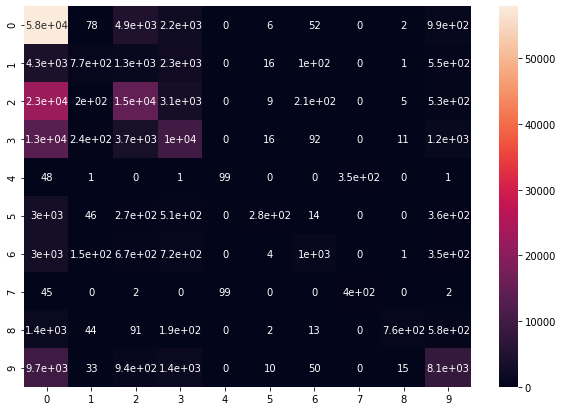

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(test_y, predictions, labels=range(10))
array = []
df_cm = pd.DataFrame(cm, index = [i for i in range(10)],
                  columns = [i for i in range(10)])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)